In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

blood_data = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv')
# motor_data = pd.read_csv('/Users/larsheijnen/Thesis/data/motor/MDS-UPDRS_Part_III_21Mar2025.csv')

/var/folders/kw/d3zgy6jx0gl0lybbg494yl8c0000gn/T/ipykernel_14095/595222884.py:6: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  blood_data = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv')


In [3]:
# Group the blood_data by PATNO to count the number of visits per patient
patient_visits = blood_data.groupby('PATNO').size()

# Filter the patients that have visited more than once
multiple_visits = patient_visits[patient_visits > 1]

# Display the patients with multiple visits
print("Patients with multiple visits:")
print(multiple_visits)

Patients with multiple visits:
PATNO
3000      478
3001      749
3002      674
3003      660
3004      661
         ... 
211597     60
213954     38
224282     38
233667     41
243457      2
Length: 1697, dtype: int64


,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
50,3300,Male,Control,SC,DNA,ApoE Genotype,e4/e3,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0
5686,3300,Male,Control,BL,miRNA,ZNF746,407,counts,2013-06-20,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
5684,3300,Male,Control,BL,miRNA,SRCAP,253,counts,2013-06-20,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
5683,3300,Male,Control,BL,miRNA,SNCA-E4E6,386,counts,2013-06-20,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
5682,3300,Male,Control,BL,miRNA,SNCA-E3E4,2077,counts,2013-06-20,105,Clemens Scherzer,"Harvard Medical School, Brigham & Women’s Hosp...",2013-09-17 13:25:52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
472529,3300,Male,Control,V06,Cerebrospinal Fluid,pRab10 CSF,1.68,pg/ml,2024-06-24,221,Omar Mabrouk,Biogen,2024-07-16 10:26:33.0
488237,3300,Male,Control,V08,Cerebrospinal Fluid,DDC (replicate 1; plate 3),41.2,pg/mL,2024-07-04,274,Roland Heym,Abbvie,2024-07-11 08:02:27.0
488019,3300,Male,Control,BL,Cerebrospinal Fluid,DDC (replicate 1; plate 3),29.4,pg/mL,2024-07-04,274,Roland Heym,Abbvie,2024-07-11 08:02:27.0
488020,3300,Male,Control,BL,Cerebrospinal Fluid,DDC (replicate 2; plate 3),39.7,pg/mL,2024-07-04,274,Roland Heym,Abbvie,2024-07-11 08:02:27.0


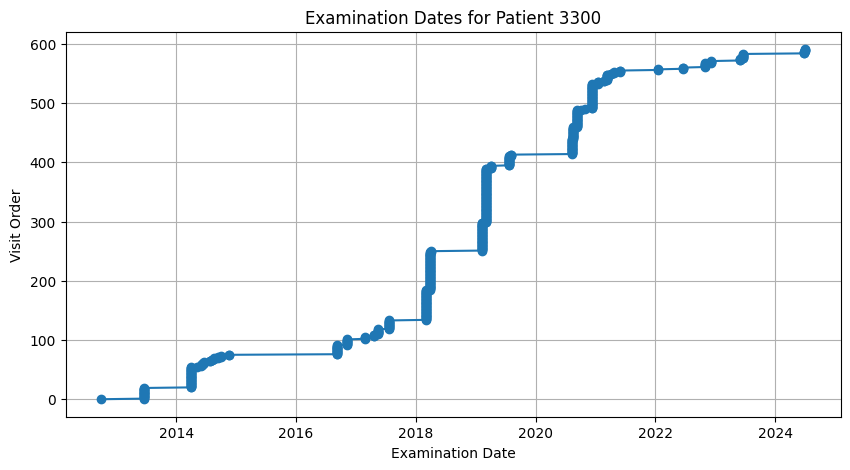

In [5]:
# Set the patient ID of interest
patient_id = 3300

# Filter for the specific patient
patient_records = blood_data[blood_data['PATNO'] == patient_id].copy()

# Convert RUNDATE to datetime format
patient_records['RUNDATE'] = pd.to_datetime(patient_records['RUNDATE'], errors='coerce')

# Sort records by examination date
patient_records.sort_values('RUNDATE', inplace=True)

# Display table of the patient's records
display(patient_records)

# Plot the examination dates
plt.figure(figsize=(10, 5))
plt.plot(patient_records['RUNDATE'], range(len(patient_records)), marker='o', linestyle='-')
plt.title(f"Examination Dates for Patient {patient_id}")
plt.xlabel("Examination Date")
plt.ylabel("Visit Order")
plt.grid(True)
plt.show()